# Statistical Hypothesis Tests

This notebook is a summary of the most important statistical tests in python
1. T-Test
2. ANOVA
3. Goodness of Fit, $\chi^2$
4. Acceptance sampling

Necessary assumption tests and plots are covered too:
5. Normality
6. 
7. 

Some alternative tests for the case in which assumptions are not met are provided too:
8. 
9. 
10. 

Sources:

https://medium.com/@rrfd/f-tests-and-anovas-examples-with-the-iris-dataset-fe7caa3e21d0

https://www.statisticshowto.com/probability-and-statistics/t-test/#PairedTTest

https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

https://www.itl.nist.gov/div898/handbook/eda/section3/eda35f.htm

https://www.statology.org/chi-square-goodness-of-fit-test-python/

## Hypothesis Testing

Brief explanation.

- `H0`: Null hypothesis, the one we usually want to reject. Example: *"The new drug has no effect on the recovery time, e.g. mean recovery time of placebo = drug"*.
- `Ha`: Alternate hypothesis (aka `H1`, `HA`), the one we usually want to confirm. *"The new drug does have an effect on the recovery time, e.g. mean recovery time of drug is different/shorter than that of the placebo"*.
- `alpha` (threshold significance, or significance level): typically set to `0.05`, p-value threshold below which we can reject `H0` and take `Ha` as probable. We basically acknowledge that there is an `alpha` chance of `H0` being correct, thus, wrongly rejected. Therefore, `alpha` is the **Type-I error**, i.e., the **false positive** error. We usually compute the p-value of `H0` and check that it is below the threshold `alpha`. We can also compute the critical statistic for `alpha` and check that our statistic is in the limits.

Other important concepts:
- Factor
- Treatment
- Condition
- Assumptions
- Degree of freedom, `df`
- Between vs within studies
- Repeated measures
- Parametric vs. non-parametric tests
- PDF, CDF
- `beta` (`1-beta` = Power): **Type-II error**, i.e., the **false negative** error, the worst of the errors and the one we'd like to avoid. A typical value for the power is `1-beta = 0.8`. We can build a `2x2`confusion matrix with `H0` and `HA` being chosen/rejected. In the cells, we would have `alpha` and `beta`
    - p(choose `Ha`|`Ha` is true) = `1-beta` = power
    - p(choose `H0`|`H0` is true) = `1-alpha`
    - p(choose `Ha`|`H0` is true) = `beta` = p(type II error)
    - p(choose `H0`|`Ha` is true) = `alpha` = p(type I error)
- Sample size (`N`): how many samples do we need to draw meaningful conclusions? Usually that is studied in a **power analysis**, when studying the **experimental design** (see below).
- Effect size (`ES`): magnitude of the effect that is significant; in addition to the significance of the treatment (p-value), we compute how big that effect is. Depending on the statistical test, different `ES` computations can be done. A typical one is Cohen's d. Given two samples A and B for which variable x is measured:
    - $d = ES = \frac{mean(x_A) - mean(x_B)}{S_{AB}}$
    - $S_{AB} = \sqrt{\frac{(N_A-1)*S_A^2 + (N_B-1)*S_B^2}{N_A+N_B-2}}$, pooled standard deviation
    - Then:
        d < 0.2: small effect,
        0.2 < d < 0.5 medium,
        d > 0.5 large

## Experimental Design

- We need to maintain all possible influences constant when we administer any treatment, i.e., maintain any known factors constant, as well as any cicumstances that might hide unknown factors
- Good practices
    - Randomization: systematically alter order of treatments
    - Use groups of similar people
    - Use control groups: groups that do not receive any treatment
    - Use blind trials: single-blind (participant is agnostic), double-blind (participant & tester agnostic), triple-blind (participant, tester, statiscian agnostic)
- Consider **power analysis**
    - These four parameters are inter-related, so we can obtain one given the other three:
        - effect size `ES` (magnitude of the effect),
        - `alpha` (type I error),
        - `beta` (type II error),
        - sample size `N` (number of measurements)
    - Typical power analyses done:
        - A priori or before the study: given `ES`, `alpha`, `beta`, compute the sample size `N` required for them. While `alpha` and `beta` are set as requirements, `ES` is computed with pilot studies or looking at similar studies.
        - Post-hoc or after the study: given `ES`, `alpha`, sample size `N`, compute the type II error `beta` or power (`1-beta`) of the study.

## 1. T-Test

A T-Test compares two **averages** (means) and determines the likelyhood that they belog to the same or different distributions. The differences between means can be due to the fact that they belong to different distributions, or they could happen by chance.

Typical example: The efficiency of a drug is tested: a control group receives a placebo and the other group the drug; the recovery time is measured. Are the means of both sampled groups effectively the same, i.e., do they belong to the same distribution?

Types of T-Tests:
1. **One sample T-test**: the mean of the samples is compared to a known (theoretical) population mean.
2. **Independent samples T-test**: the means of two independent sample sets are compared.
3. **Paired/Related/Repeated samples T-test**: the means of the same group (samples) are compared at different times or treatments.

The T score or statistic is computed and its associated probability evaluated in the Student's T distribution.
- The T score is the ration between the difference between the groups and the difference within the groups
- The larger the T score, the more likely we have two different distributions
- The T distirbution is similar in shape to the normal distribution, but with fatter tails for smaller sample sizes
- Unique parameter of the T distribution: Defree-of-freedom: `df = N - 1`, sample size; `T(df->inf) = Normal(0,1)`

**T statistic computation**:
- One sample with $x_i$ measurements:
    - $T = \frac{mean(x) - m}{\frac{s}{\sqrt{N}}}$
    - $m$: population mean
    - $N$: sample size
    - $s$: sample standard deviation: $s^2 = \frac{\sum{x-mean(x)}}{N-1}$
    - $mean(x)$: sample mean
    - `df` = N-1

- Two samples (independent):
    - $T = \frac{mean(x_A) - mean(x_B)}{s_{AB}*\sqrt{\frac{1}{N_A}+\frac{1}{N_B}}}$
    - $s_{AB} = \sqrt{\frac{(N_A-1)*s_A^2 + (N_B-1)*s_B^2}{N_A+N_B-2}}$, pooled standard deviation
    - `df` = $N_A + N_B - 2$

**Two-sided/tailed vs one-sided/tailed**:
- Test distributions can be symmetrical (e.g., Student's T distribution) or asymmetrical (e.g. F distribution for ANOVAs, or Chi-square tests)
    - Tests based on asymmetrical distributions are always one-sided
    - Tests based on symmetrical distributions can be one-sided or two-sided
- **One-sided** tests check if there is a difference between groups **in a specific direction**, e.g., one mean is expected bigger than the other.
- **Two-sided** tests check if there is a difference between groups **in any direction**, e.g., means expected to belong to different distributions.
- When we manually check the p-value given a statistic, we check the area under the curve in one extreme tail: 1-CDF(t). That is a one-sided test and p-value.
    - The two-sided p-value is 2x the one-sided one.
    - Why? because a value of t comes from the difference of means in one direction; we have an equivalent -t for the other direction, which takes the area of the other tail. Since the distribution is symmetrical, both areas are the same, thus, the complete p-value area is 2x one tail.
- Usually, the two-sided check is the go, which is also more conservative: higher p-value -> more difficult to reject `H0`.

**Assumptions**: 
- Measurements normally distributed: tested with boxplots, QQ-plots and Shapiro-Wilks test 
- Same variance; if not, it must be entered as `equal_var=False` and Welch's T-test is performed
- For the independent samples test: independent sampling of the population between groups

**IMPORTANT note**: do not use T-tests repeteadly in groups pairwise without corrections, because it leads to false positives (it increases type I error). Instead, use ANOVA.

### 1.1 Plotting the Student's T Distribution

In [131]:
import numpy as np
from scipy.stats import norm,t
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
df_values = [1, 10, 100]
linestyles = [':', '--', '-']
linecolors = ['red', 'green', 'blue']
x = np.arange(-10, 10, 0.01)

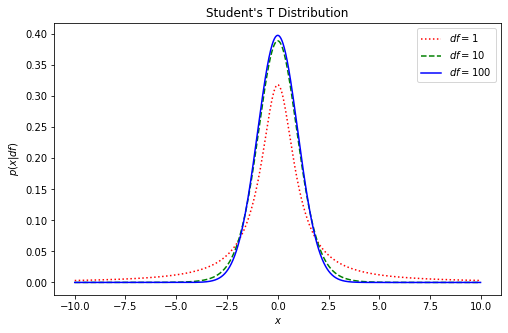

In [133]:
# Student's T Distribution: Probability Density Function
fig, ax = plt.subplots(figsize=(8, 5))
for (df,ls,lc) in zip(df_values, linestyles, linecolors):
    dist = t(df)
    # NOTE: if we have a discrete distribution, use plt.step(), not plt.plot()
    plt.plot(x, dist.pdf(x), color=lc, linestyle=ls, label='$df={}$'.format(df))
plt.xlabel('$x$')
plt.ylabel('$p(x|df)$')
plt.title("Student's T Distribution")
plt.legend()
plt.show()

### 1.2 Performing the Tests

#### Data

In [134]:
# Sythetic measurements
N = 100
# Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
# Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

<AxesSubplot:ylabel='Count'>

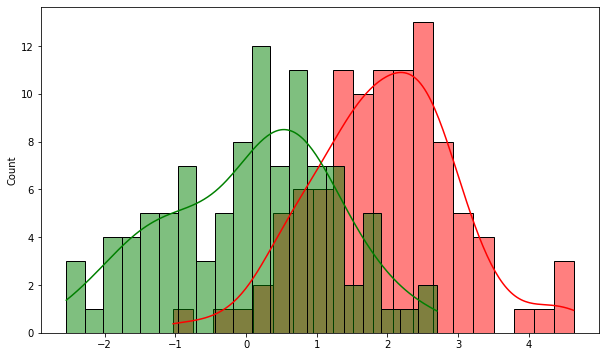

In [135]:
plt.figure(figsize=(10,6))
sns.histplot(data=a,color='red',kde=True,bins=20)
sns.histplot(data=b,color='green',kde=True,bins=20)

#### Tests

In [136]:
# Several T-Tests are available, given arrays of measurement a and b:
# scipy.stats
# .ttest_1samp(a, popmean): mean of the sample compared to a population mean; two-sided
# .ttest_ind(a, b): two independent sample means compared; two-sided
# .ttest_rel(a, b): two related/repeated sample means compared; two-sided
# .ttest_ind_from_stats(ma, sa, na, mb, sb, nb): means of two independent samples from descriptive statistics compared; two-sided

In [137]:
# Two independent samples
t, p = stats.ttest_ind(a,b)

In [138]:
# p < 0.05 -> H0 can be rejected, both samples belong to two different distributions
print("t = " + str(t))
print("p = " + str(p))

t = 12.00022883751669
p = 2.7449121662279317e-25


In [139]:
# Two repeated samples
t, p = stats.ttest_rel(a,b)

In [140]:
# p < 0.05 -> H0 can be rejected, both samples belong to two different distributions
print("t = " + str(t))
print("p = " + str(p))

t = 13.099663938346794
p = 2.4160444301959093e-23


Observations:
- For both independent and paired/repeated samples, the T statistic and the `df`s vary, so the T distribution is different and the value check in there too, thus, a different p-value is obtained
- For larger sample sizes, the results are more conclusive

### 1.3 Alternative: Manual Computations

In [141]:
# Variance s^2 of each sample computed with N-1 (ddof=1)
var_a = a.var(ddof=1) # (s_A)^2
var_b = b.var(ddof=1) # (s_B)^2

# Pooled standard deviation: standard deviation of both samples together
s_ab = np.sqrt(((len(a)-1)*var_a + (len(b)-1)*var_b)/(len(a)+len(b)-2))

# T statistic
t = (a.mean() - b.mean())/(s_ab*np.sqrt((1/len(a))+(1/len(b))))

In [142]:
print("t = " + str(t))

t = 12.00022883751669


In [143]:
# With T and df, we can get the p-value from the T distribution
df = len(a) + len(b) - 1
# p-value is obtained form the cummulative density function (CDF) with the given df
# since we want the remaining are under the PDF, we need to compute 1-CDF(t)
p = 1 - stats.t.cdf(t,df=df)
# Since we usually compute a 2-sided test (differences in any direction tested)
# we need to 2x the p-value
p *= 2.0
# Display
print("t = " + str(t))
print("p = " + str(p))

t = 12.00022883751669
p = 0.0


## 2. ANOVA

## 3. Goodness of Fit

## 4. Acceptance sampling

## 5. Assumption Checks

### Normality

In [117]:
# Sythetic measurements
N = 50
# Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
# Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

#### Boxplots

#### QQ Plots

#### Shapiro-Wilk